## ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Convolutional Neural Networks (CNNs)
 


**By the end of the lesson, you should be able to:**
- Identify use cases for convolutional neural networks and when they are superior to other neural networks.
- Describe convolutional and pooling layers.
- Define padding and filters.
- Fit CNNs in Keras.


Convolutional neural networks are generally used for image classification tasks

They are more **efficient** and provide better **performance** than simple, dense, feedforward neural networks.

To illustrate this, let's build a feedforward neural network for the MNIST Handwritten Digits dataset.

In [1]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

#### Load pre-shuffled MNIST data into train and test sets


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

#### Check shape of one image

In [5]:
## Checking one image in X_train
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
## Check the shape of that one image
X_train[0].shape

(28, 28)

In [7]:
## What datatype is this image?
type(X_train[0])

numpy.ndarray

#### Visualize the first image

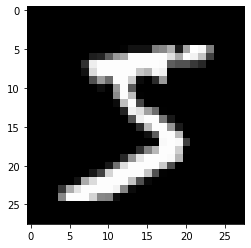

In [8]:
## Use plt.imshow() to plot an ndarray of pixels as an image
plt.imshow(X_train[0], cmap='gray');

In [9]:
## Check the corresponding label in y_train
y_train[0]

5

##### Scale our data to be between 0 and 1.

When working with image data, we commonly scale it to be between 0 and 1. NN models often perform better if the features are on a similar scale.

How might we scale our data between 0 and 1?
<details> Divide by $255$ </details>

#### Make sure each value is a float before scaling


In [10]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.

X_train /= 255
X_test /= 255

<img src="./images/picture.png" alt="drawing" width="400"/>

[Image by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [12]:
## Check the shape of one image
X_train[0].shape

(28, 28)

In [13]:
## Check how many images are in the training set
X_train.shape

(60000, 28, 28)

##### Reshape each image to have three dimensions: 28 x 28 x 1.

The third dimension is the color.

We just have one number for the color, because these are grayscale images. 🔘

An image with three color chanels e.g. RGB (red/green/blue) would have shape 28 x 28 x 3. In the third dimension, one value corresponds to how red 🔴 the pixel is, one value corresponds to how blue 🔵 the pixel is, and one value corresponds to how green 🍏 the pixel is. 

- Reshaping your images is a tricky part of pre-processing for deep learning. ⚠️

In [14]:
# Reshape each image to be 28 x 28 x 1.
# The 1 corresponds to the one black/white value.
# If we had a color image, we would likely use 3 for RGB.

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # same number of everything
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Now let's check out `y_train`.

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_train[0].shape

(28, 28, 1)

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

<details><summary>What change do we need to make to y_train? Why?</summary>

- Right now, the values of `y_train` will be interpreted as a number. Our neural network would try to predict values that are numerically close to the true value. (i.e. If $Y = 5$, then $\hat{Y} = 4$ would be way better than $\hat{Y} = 1$. **This isn't actually what we want!**
- We need to convert it by one-hot encoding it.
</details>

#### Change y_train


In [18]:
## One-hot encode y_train using utils.to_categorical()
y_train_encoded = utils.to_categorical(y_train, 10)
y_test_encoded = utils.to_categorical(y_test, 10)

In [19]:
## Check what our encoded y_train looks like now
y_train_encoded[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Create a fully connected feedforward neural net with:

- A 128-node hidden layer
- A 32-node hidden layer
- The appropriate output layer
- Score on accuracy


Use defaults/usual suspects for any hyperparameters. 


In [20]:
X_train[0].shape

(28, 28, 1)

In [21]:
# When instantiating our model, what do we first write?
model1 = Sequential()

In [22]:
# In order to "align" our neurons in a vertical array, we
# add a "Flatten" layer. This will be required before adding
# subsequent Dense layers. We need to specify the input shape.

# This is taking our 28x28x1 pixel grid and flattening it to 784 input nodes
model1.add(Flatten(input_shape = X_train[0].shape))

<img src="./images/picture.png" alt="drawing" width="400"/>

<img src="./images/network.png" alt="drawing" width="400"/>

[Images by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [23]:
model1.add(Dense(128, activation="relu"))
model1.add(Dense(32, activation="relu"))

## 10 neurons in our output layer (one for each class in our target)
## activation = softmax because this is multiclass classification
model1.add(Dense(10, activation="softmax"))

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [25]:
## Where are we getting this number of total params from?
# 784 features (after flattening) * 128 neurons in first hidden layer + 128 bias terms
# 128 neurons in 1st HL * 32 neurons in 2nd HL + 32 bias terms
# 32 neurons in 2nd HL * 10 neurons in output layer + 10 bias terms
(784*128 + 128) + (128*32 + 32) + (32*10 + 10)

104938

#### Compile model


In [26]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

#### Fit model on training data

In [27]:
## We'll use a batch_size of 256 and 10 epochs
hist1 = model1.fit(
    X_train,
    y_train_encoded, 
    batch_size=256,
    validation_data=(X_test, y_test_encoded),
    epochs=10
    )

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4669 - accuracy: 0.8666 - val_loss: 0.2031 - val_accuracy: 0.9432
Epoch 2/10
235/235 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9501 - val_loss: 0.1422 - val_accuracy: 0.9588
Epoch 3/10
235/235 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9633 - val_loss: 0.1159 - val_accuracy: 0.9661
Epoch 4/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9717 - val_loss: 0.1047 - val_accuracy: 0.9697
Epoch 5/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9766 - val_loss: 0.0925 - val_accuracy: 0.9716
Epoch 6/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.0840 - val_accuracy: 0.9749
Epoch 7/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9843 - val_loss: 0.0823 - val_accuracy: 0.9751
Epoch 

In [28]:
hist1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Evaluate model on test data


In [29]:
model1.evaluate(X_test,y_test_encoded)

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9761


[0.07718241214752197, 0.9761000275611877]

In [30]:
## We can extract the results to print this nicely as well
score = model1.evaluate(X_test,
                       y_test_encoded,
                       verbose=1)

labels = model1.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9761
loss: 0.07718241214752197
accuracy: 0.9761000275611877


In [31]:
def plot_hist(hist, metric = "loss"):
    """ plot the results from neural net training 
    
    Args:
        hist (TF history object): The history of the training
        metric (string): The name of the metric to plot (name should be the same as key in hist.history)
    
    Returns: 
        None
    """
    
    plt.figure(figsize=(12, 8))

    plt.plot(hist.history[metric], label=f'Train {metric.capitalize()}')
    plt.plot(hist.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')

    plt.title(f'Training & Testing {metric.capitalize()} by Epoch', fontsize=25)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel(metric.capitalize(), fontsize=18)

    plt.legend(fontsize=18);

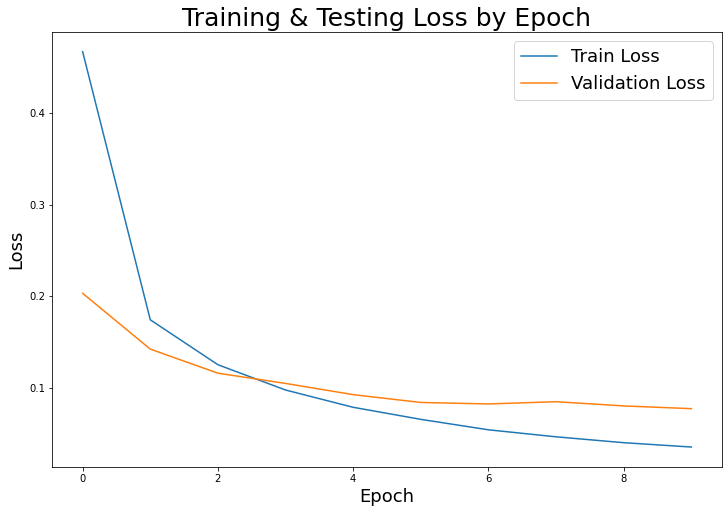

In [32]:
plot_hist(hist1)

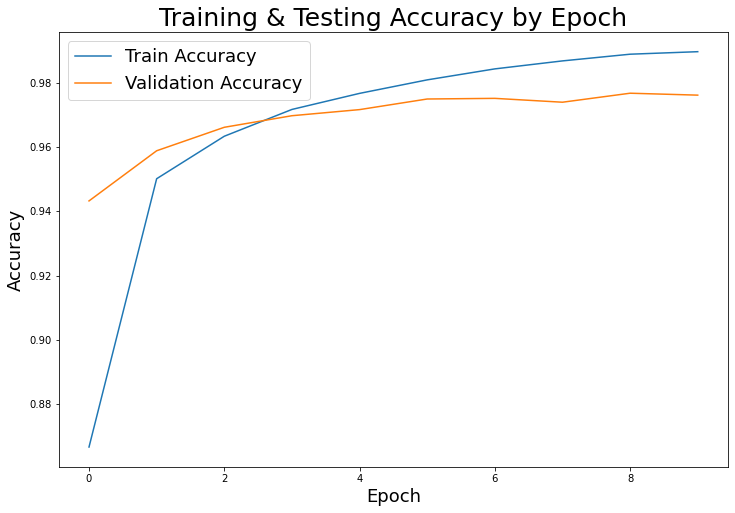

In [33]:
plot_hist(hist1, metric = "accuracy")

<details><summary>How many parameters are being fit in this model?</summary>

- In our input layer, we have $28 * 28 = 784$ nodes.
- In our first hidden layer, we have $128$ nodes.
- In our second hidden layer, we have $32$ nodes.
- In our output layer, we have $10$ nodes.
- There is one bias value for each neuron in every hidden layer and output layer, which is $128 + 32 + 10 = 170$ bias parameters.
- There is one weight value connecting each node from the input to first hidden layer, which is $784 * 128 = 100,352$ weight parameters.
- There is one weight value connecting each node from the first hidden layer to the second hidden layer, which is $128 * 32 = 4,096$ weight parameters.
- There is one weight value connecting each node from the second hidden layer to the output layer, which is $32 * 10 = 320$ weight parameters.
- Adding these up, we get $170 + 100,352 + 4,096 + 320 \approx 104,938$ parameters.
</details>

<details><summary>If my model were to be underfit, what might I do?</summary>

- I could try decreasing the batch size.
- I could try increasing the number of epochs.
- I could try increasing the number of layers.
- I could try increasing the number of nodes in each layer.
</details>

<details><summary>What are some consequences of fitting a model with too many parameters?</summary>

- Easy to overfit our model.
- Learning is quite slow.
- We need more data in order to meaningfully learn and fit a model!
</details>

---
## Convolutional Neural Networks (CNNs)
Convolutional neural networks are a great way to get around this issue of too many parameters. 

CNNs can learn local patterns, such as edges and curves. They can recognize these patterns anywhere in an image. 

A CNN will generally consist of three types of layers:
- Convolutional Layer
- Pooling Layer
- Densely Connected Layer

<img src="./images/cnn.jpeg" alt="drawing" width="600"/>

[Image source.](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

CNNs compress images through pooling layers, so our models have far fewer parameters than a fully connected feedforward network. 🎉

---
## Convolution Layer

#### Filters
The convolution layer is where we pass a filter over an image and do some calculation at each step. Specifically, we take pixels that are close to one another, then summarize them with one number. The goal of the convolution layer is to identify important features in our images, such as edges.

<img src="./images/convolution.gif" alt="drawing" width="550"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

Our hyperparameters here are:
- `filters` the number of filters to use. 
- `kernel_size` the dimensions of the filter. 3x3 generally works well. 

#### What's a filter?

A filter is a feature mapping. The ideas is that each filter can detect one type of feature in an image (like vertical edges). 

At first, the final dimension in the output shape is the color channels. In our case it's a value between 0 and 1 indicating the dark/light grayscale.

The *number of filters* in a convolutional layer is the final dimension in the output shape from that layer. See the `summary()` method.


#### How many filters should we use? 

It's a hyperparameter. 🙃 The answer may depend on the complexity of your images (simpler images require fewer filters) and usually requires trial and error to identify an adequate value of `filters`. [Source](https://stats.stackexchange.com/questions/196646/what-is-the-significance-of-the-number-of-convolution-filters-in-a-convolutional)

### Create a CNN model

In [34]:
## Instantiate our CNN model
cnn_model = Sequential()

In [35]:
## Add a convolutional layer
cnn_model.add(Conv2D(filters=16,               # number of filters
                     kernel_size=(3, 3),       # height/width of filter
                     activation='relu',        # activation function
                     input_shape=(28, 28, 1))) # shape of input (one image)

#### Add a MaxPooling2D layer

In [36]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))  # dimensions of region of pooling

#### Add another convolutional layer and a pooling layer

In [37]:
cnn_model.add(Conv2D(filters=32,               # number of filters
                     kernel_size=(3, 3),       # height/width of filter
                     activation='relu',        # activation function
                     input_shape=(28, 28, 1))) # shape of input (one image)

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))  # dimensions of region of pooling

#### Add Flatten, fully connected, and output layers

<img src="./images/flattening_image.png" alt="drawing" width="500"/>

[Image source.](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

In [38]:
# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

# Add a final layer with 10 neurons.
cnn_model.add(Dense(10, activation='softmax'))

<img src="./images/pic1.png" alt="drawing" width="400"/>

<img src="./images/pic2.png" alt="drawing" width="400"/>

<img src="./images/pic3.png" alt="drawing" width="400"/>

<img src="./images/pic4.png" alt="drawing" width="400"/>

[Image by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [39]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

#### Compile model


In [40]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

#### Fit model on training data


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
# Fit model on training data
cnn_hist = cnn_model.fit(X_train, y_train_encoded,
                         batch_size=256, epochs = 10,
                         validation_data=(X_test, y_test_encoded),
                         callbacks=EarlyStopping(patience=5))

Epoch 1/10
235/235 [==============================] - 3s 4ms/step - loss: 0.3978 - accuracy: 0.8885 - val_loss: 0.1074 - val_accuracy: 0.9648
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9684 - val_loss: 0.0763 - val_accuracy: 0.9773
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.0542 - val_accuracy: 0.9827
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.0478 - val_accuracy: 0.9837
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0458 - val_accuracy: 0.9842
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.0382 - val_accuracy: 0.9870
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0410 - val_accuracy: 0.9871
Epoch 

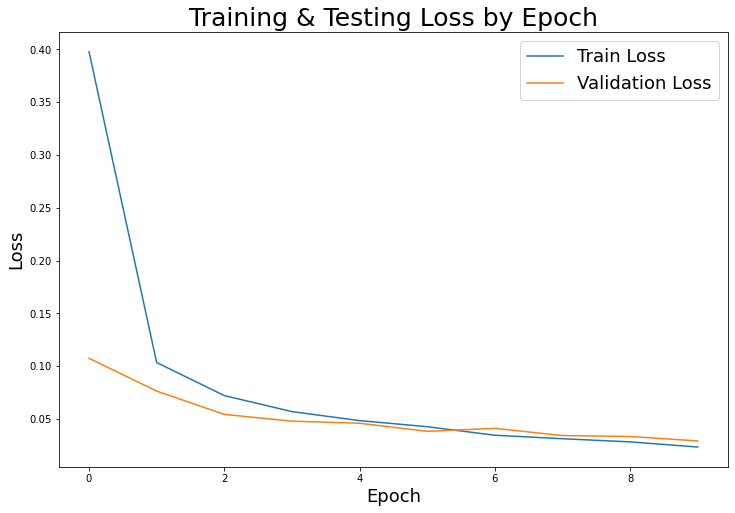

In [43]:
plot_hist(cnn_hist)

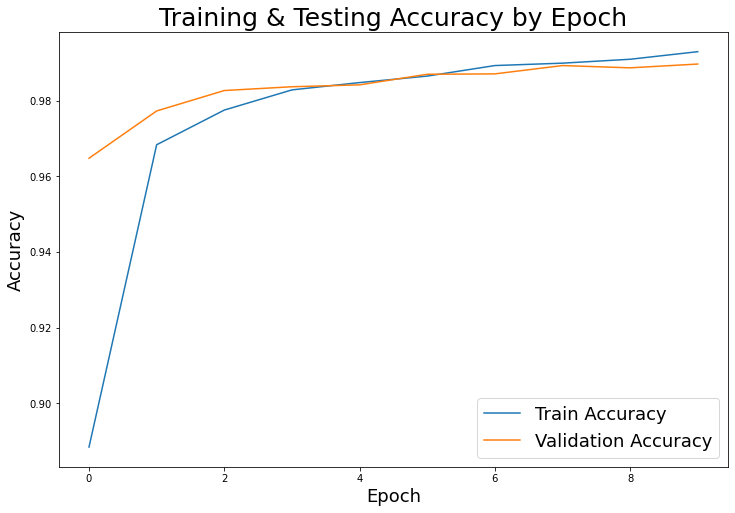

In [44]:
plot_hist(cnn_hist, "accuracy")

## Save the model and reload it

In [45]:
cnn_model.save('my_model.h5')

In [46]:
import tensorflow as tf
reconstructed_model = tf.keras.models.load_model('my_model.h5')

#### Evaluate model on test data


In [47]:
cnn_model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9897


[0.029090939089655876, 0.9897000193595886]

In [48]:
reconstructed_model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9897


[0.029090939089655876, 0.9897000193595886]

#### Compare CNN and FNN models


In [49]:
cnn_model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9897


[0.029090939089655876, 0.9897000193595886]

In [50]:
model1.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9761


[0.07718241214752197, 0.9761000275611877]

---
### More on CNNs

#### Padding

With a convolutional layer, if you want the same number of pixels to continue to the next layer, you need to add zeros around the outside. Adding padding can also make the outside pixels matter more.

<details><summary>How many times does each corner get included in the "output without any padding?"</summary>

- Without padding each corner gets included only once.
</details>

We can use **padding** to add a border of white cells around the edge of the image. This will allow pixels on the edge/in the corner to be included more frequently. (This might be good when doing computer vision for self-driving vehicles!)

<details><summary>In this MNIST digits case, do you think padding is a good idea or a bad idea?</summary>

- Padding is probably not helpful here. We're increasing the number of parameters we need to learn, but it's unlikely that we're getting important data from the corners/edges of the image. 
</details>

[Let's visualize what the convolution operation looks like](https://ezyang.github.io/convolution-visualizer/).

---
### Pooling Layer

CNNs learn far fewer parameters than a similar-sized regular feedforward neural network. Most of the "parameter reduction" comes from the pooling layers.

<img src="./images/maxpool.png" alt="drawing" width="400"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

In Max Pooling, we pass a filter over an image. At each step, we take the maximum value and record it as part of the output.
- When pooling, we generally partition the result from the previous layer. That is, the filter doesn't overlap as it does in the convolutional layer.

The primary hyperparameters is the **dimensions of the filter when pooling**. This is given by `pool_size = (2, 2)` in our example.

##### Why use max pooling?
1. Reduces the data dimensionality.
2. Protects against overfitting by creating a more abstract representation.
3. Provides some invariance by ignoring insignificant local changes in the image.

---
### Densely-Connected Layer
The densely-connected layer is the same as in a normal feedforward neural network. A dense layer is expecting the shape of the data being fed to it to have 1 fewer dimension than a 2D CNN. 

#### So remember to pass a `Flatten()` layer before a `Dense()` layer, if you are coming from a 2D CNN. ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

---
## Exercise
### Make another CNN

Include 3 CNN layers and 3 fully connected layers with some dropout.

#### Evaluate model on test data.



#### Compare models


---
## Summary

Convolutional neural networks are uniquely suited to tackle image data. You've seen how to reshape and scale data for CNNs. You've created CNNs that perform better than dense feedforward networks.

### Check for understanding


<details><summary>Why are convolutional neural networks better equipped to handle image data than non-CNNs?
</summary>

- CNNs are naturally set up to consider interactions among "close pixels" only and can drastically cuts down the number of parameters needed to learn. (Or get better performance for a given number of parameters!)
</details>

- How does a max pooling layer work?
- What layer do you need before a fully connected dense layer?


<details><summary>Can you think of other situations (i.e. not images) in which we might apply a convolutional neural network?</summary>

- **Videos**. A video is really just a sequence of pictures, so we might use a 3D convolutional neural network. (Length of the picture, width of the picture, and depth of the picture is time.)
- **Time series data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring time periods in time series data?
- **Natural language data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring words or tokens in natural language data?
- Convolutional neural networks exploit the inherent structure in data we pass in.
</details>

### To go deeper

- Check out [this good Machine Learning Mastery post](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/). 

- And see Chollet's Deep Learning in Python book (v2) chapter 8.

- Also check out Geron's Hands On Machine Learning with Sklearn and Tensorflow (v2) chapter 14. [Link to notebook for that chapter on Github](https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb)